# Sentiment Analysis

## Imports, constants and setup

In [1]:
from __future__ import annotations

from collections import Counter

import joblib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from wordcloud import WordCloud

from app.constants import CACHE_DIR
from app.data import load_data, tokenize

In [2]:
tqdm.pandas()

In [3]:
SEED = 42
CACHE = joblib.Memory(CACHE_DIR, verbose=0)

## Data loading

In [4]:
# Load data and convert to pandas DataFrame
text_data, label_data = load_data("test")
dataset = pd.DataFrame({"text": text_data, "sentiment": label_data})
dataset.head()

,text,sentiment
0,"Cooking microwave pizzas, yummy",1
1,"I love the humor, I just reworded it. Like sa...",1
2,That sucks to hear. I hate days like that,0
3,Umm yeah. That`s probably a pretty good note ...,1
4,That would panic me a little! Maybe you can ...,0


In [5]:
# Tokenize text data
tokens = tokenize(dataset["text"].tolist(), batch_size=1024, n_jobs=2, show_progress=True)
dataset["tokens"] = tokens.apply(" ".join)
dataset.head()

Lemmatization: 100%|██████████| 19583/19583 [01:08<00:00, 284.25doc/s]


,text,sentiment,tokens
0,"Cooking microwave pizzas, yummy",1,cook microwave pizza yummy
1,"I love the humor, I just reworded it. Like sa...",1,love humor reword like say group therapy inste...
2,That sucks to hear. I hate days like that,0,suck hear hate day like
3,Umm yeah. That`s probably a pretty good note ...,1,umm yeah probably pretty good note self eeeeee...
4,That would panic me a little! Maybe you can ...,0,panic little maybe read orbitron gym like dowh...


## Data exploration

### Sentiment distribution

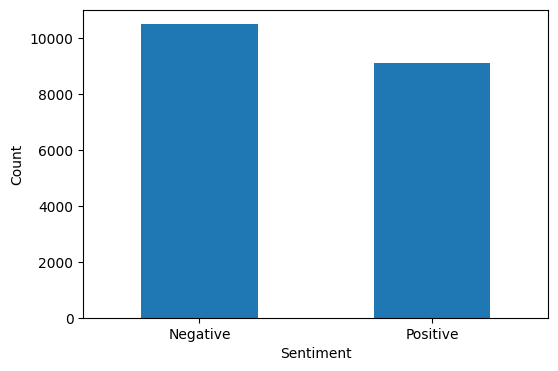

In [6]:
_, ax = plt.subplots(figsize=(6, 4))

dataset["sentiment"].value_counts().plot(kind="bar", ax=ax)
ax.set_xticklabels(["Negative", "Positive"], rotation=0)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")

plt.show()

### Word cloud (before tokenization)

  0%|          | 0/19583 [00:00<?, ?it/s]

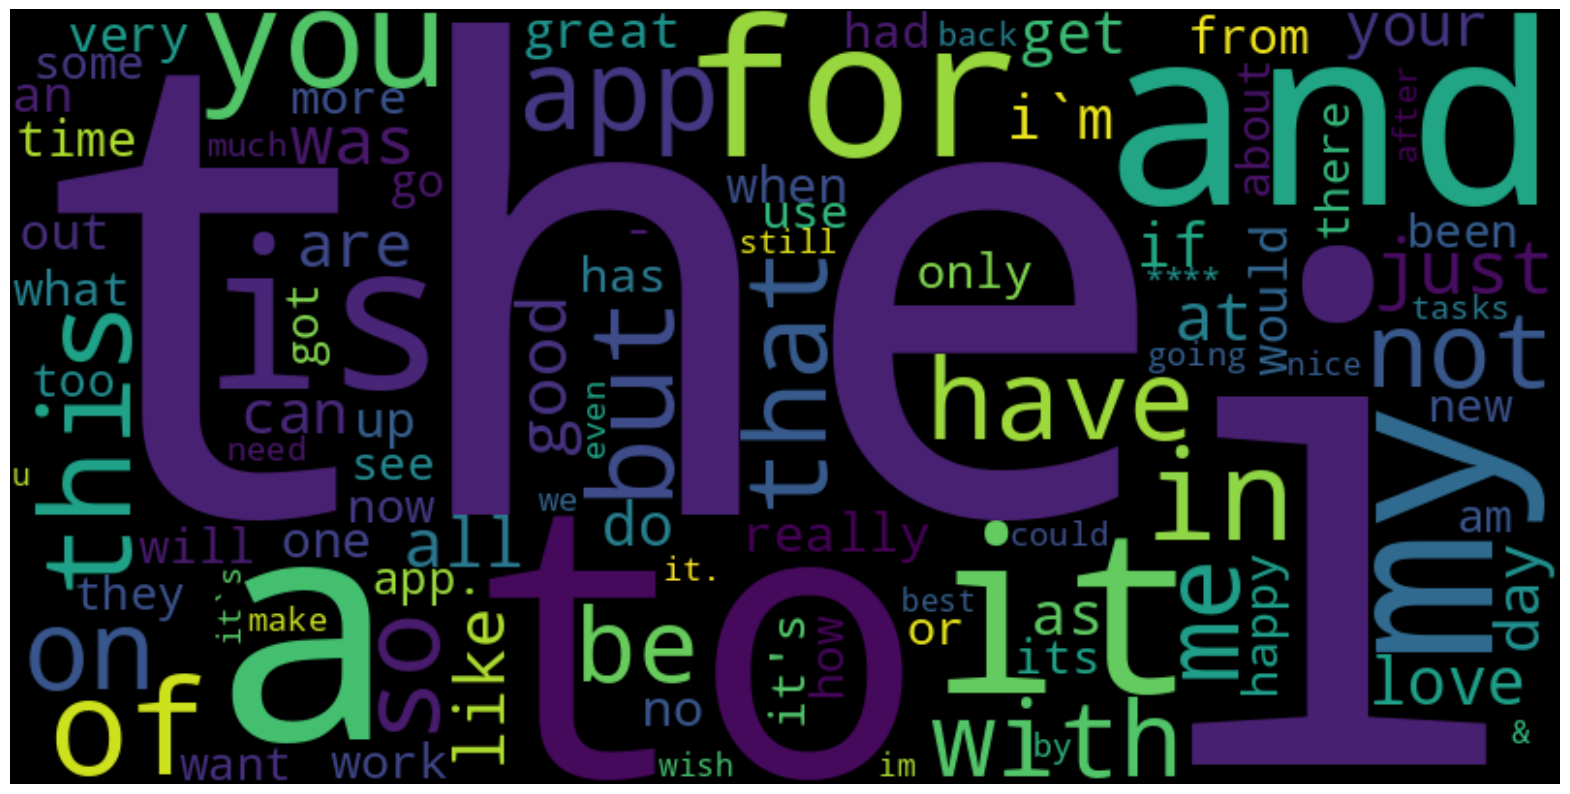

In [7]:
# Gather all the unique words in the dataset
word_freq = Counter()
dataset["text"].str.lower().str.split().progress_apply(word_freq.update)

# Now get the most common words
common_words = word_freq.most_common(100)

# Create a word cloud of the most common words
wrd_cloud = WordCloud(width=800, height=400, random_state=SEED).generate_from_frequencies(dict(common_words))

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wrd_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word cloud (after tokenization)

  0%|          | 0/19583 [00:00<?, ?it/s]

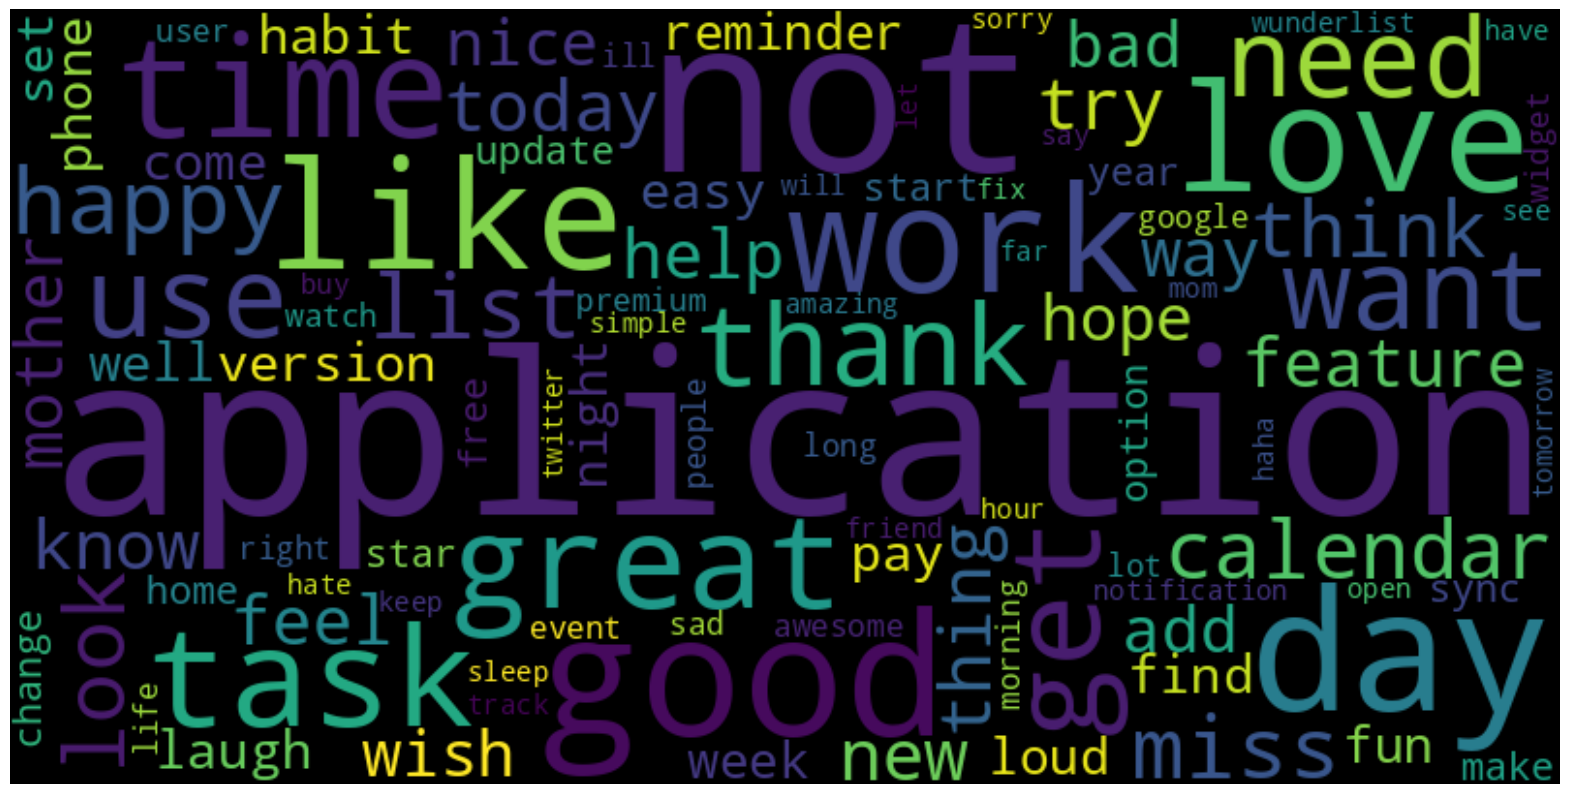

In [9]:
# Gather all the unique tokens in the dataset
token_freq = Counter()
dataset["tokens"].str.split().progress_apply(token_freq.update)

# Now get the most common tokens
common_tokens = token_freq.most_common(100)

# Create a word cloud of the most common tokens
tkn_cloud = WordCloud(width=800, height=400, random_state=SEED).generate_from_frequencies(dict(common_tokens))

# Display the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(tkn_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Token association

  0%|          | 0/9105 [00:00<?, ?it/s]

  0%|          | 0/10478 [00:00<?, ?it/s]

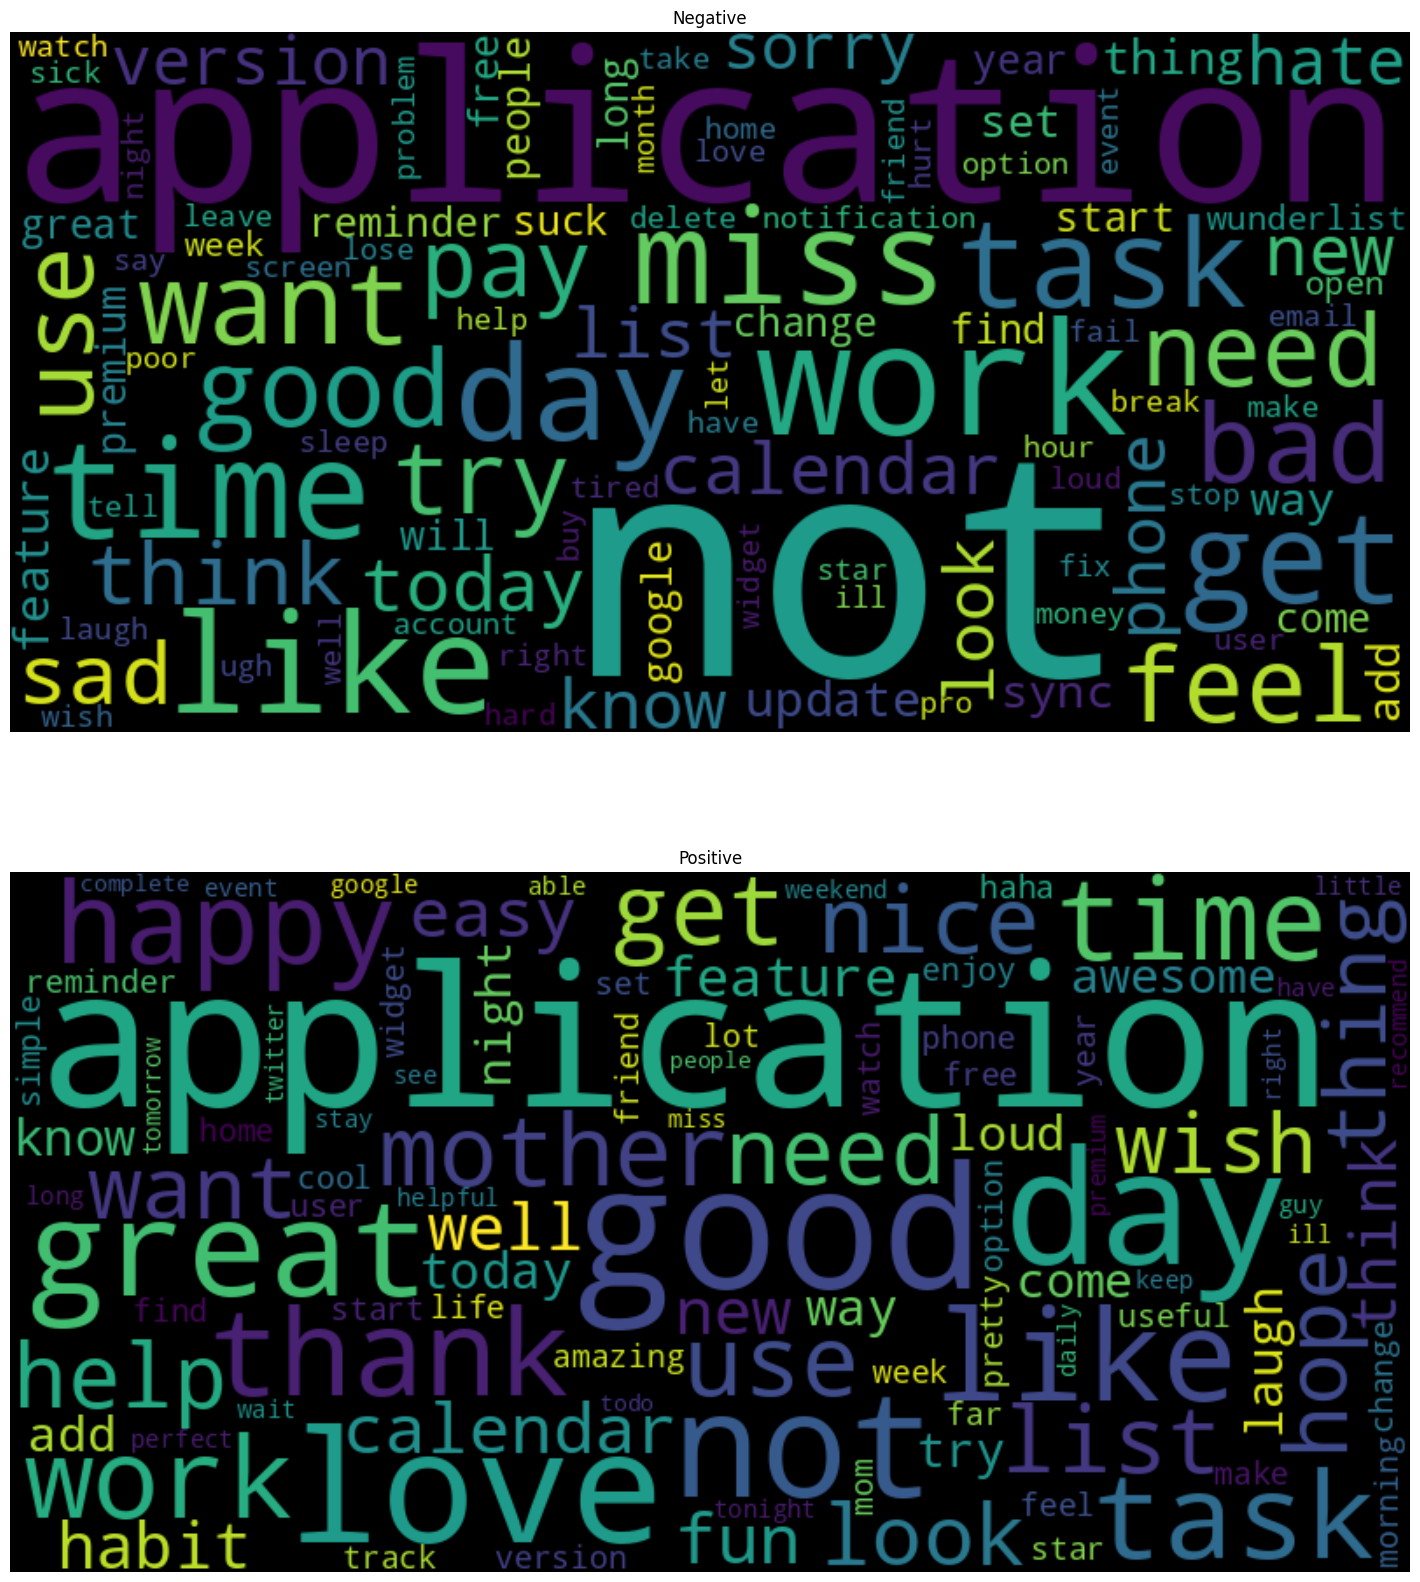

In [13]:
_, ax = plt.subplots(2, 1, figsize=(20, 20))

for i, sentiment in enumerate(["Negative", "Positive"]):
    freq = Counter()
    dataset[dataset["sentiment"] == i]["tokens"].str.split().progress_apply(freq.update)
    most_common = freq.most_common(100)

    cloud = WordCloud(width=800, height=400, random_state=SEED).generate_from_frequencies(dict(most_common))
    ax[i].imshow(cloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(sentiment)

plt.show()

## Vectorization

## Classification

## Evaluation